In [2]:
import numpy as np
import pandas as pd

In [4]:
df =pd.read_csv('email_spam.csv')

In [6]:
df.sample(15)


,Category,Message
4387,ham,", im .. On the snowboarding trip. I was wonder..."
2481,spam,Urgent! call 09066612661 from landline. Your c...
4245,ham,"Aight, I'm chillin in a friend's room so text ..."
3744,ham,"Nah, Wednesday. When should I bring the mini c..."
1632,ham,We not watching movie already. Xy wants 2 shop...
3793,ham,Love it! I want to flood that pretty pussy wit...
1416,ham,Jay is snickering and tells me that x is total...
4124,ham,"Cool, want me to go to kappa or should I meet ..."
1602,ham,Carlos is taking his sweet time as usual so le...
1639,ham,Great comedy..cant stop laughing da:)


In [8]:
df.shape

(5572, 2)

In [10]:
# checking if there any null values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
# dataset dosen't have any null values, so no need of dropping

In [14]:
#applying labelEncoder ( to change ham/spam to 0/1 respectively)
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()


In [16]:
encode.fit_transform(df['Category'])

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
df['Category'] = encode.fit_transform(df['Category'])

In [20]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
#checking missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [24]:
# checking duplicate values
df.duplicated().sum()

415

In [26]:
# removing duplicates
df= df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [30]:
df.shape

(5157, 2)

In [32]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [36]:
# to represt ham and spam in our datasets betterly we are representing it in form of pi charts

([<matplotlib.patches.Wedge at 0x1afc0aec3d0>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.6'),
  Text(0.5548334056198901, -0.22838540235364085, '12.4')])

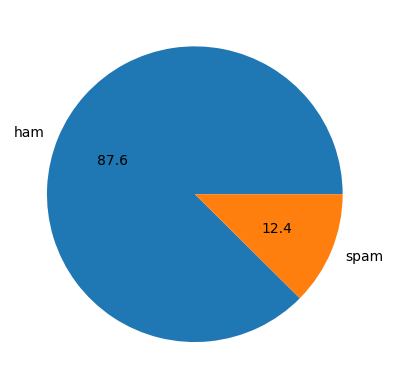

In [38]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.1f") 

In [40]:
## data is imbalanced (there is more ham and very less spam) ##

In [42]:
import nltk

In [44]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
# no_characters        :  length of each message in terms of no. of characters
df['no_characters'] = df['Message'].apply(len)

In [50]:
df.head()


,Category,Message,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [52]:
# n0_words   : we use (nltk word_tokenization function) to break the message into words)
df['no_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [54]:
df.head()

,Category,Message,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [56]:
# no_sentence   : sent_tokenize function breaks messages into parts of sentences.
df['no_sentence'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [58]:
df.head()

,Category,Message,no_characters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [60]:
df[['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
#using this describe function we can seperate spam and ham emails
# for spam (1)
df[df['Category'] ==1][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [64]:
# for_ham (0)    ( spam messages have more no of characters/words/sentences than ham)
df[df['Category'] ==0][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [66]:
# showing the difference in characters in spam and ham through histogram plots
import seaborn as sns

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_characters', ylabel='Count'>

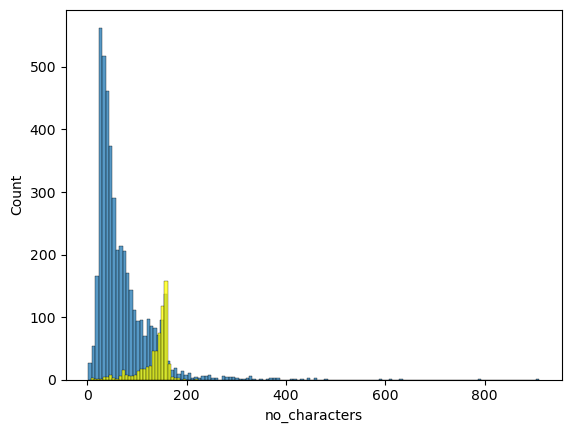

In [68]:
sns.histplot(df[df['Category']==0]['no_characters'])
sns.histplot(df[df['Category']==1]['no_characters'],color='yellow')

# data preprocessing



In [101]:
# lower case
def transform_Message(Message):
    Message = Message.lower()
   #tokenisation
    Message = nltk.word_tokenize(Message)

    # now text is a list, so we run a loop
    y=[]
    
    for i in Message:
        if i.isalnum():  # if i is alphanumeric it gets appended
            y.append(i)
     #removal of stopwords and punctuations
    Message = y[:]  # Use y here, which contains alphanumeric words
    y.clear()
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            #lemmatization 
    text = y[:]  # Make a copy of y before clearing it for stemming
    y.clear()
    for i in text:  # Use text, not Message here
        y.append(ps.stem(i))
         
    return " ".join(y)




In [103]:
transform_Message('I am working on NLP project on Emails ....%')

'work nlp project email'

from nltk.corpus import stopwords
stopwords.words('english')

In [87]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [105]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('hiding')


'hide'

In [107]:
df['Message'][244]

"Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched..."

In [109]:
transform_Message("Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched...")

'although told u dat baig face watch realli like e watch u gave co fr thanx 4 everyth dat u done today touch'

In [111]:
df['transformed_Message'] =df['Message'].apply(transform_Message)

In [97]:
df.head()

,Category,Message,no_characters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [114]:


from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color='black')

In [115]:
# concatanates the entire text into one sting seperated by spaces
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_Message'].str.cat(sep=" "))

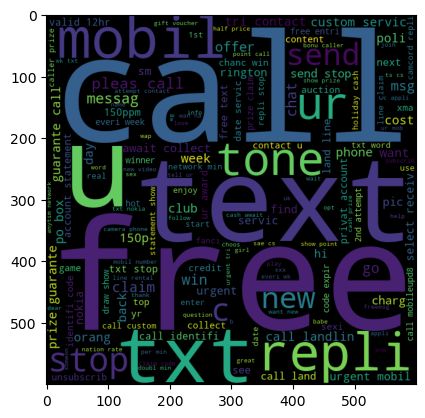

In [116]:
# shows the common words usd in spam emails
plt.imshow(spam_wc)

In [121]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_Message'].str.cat(sep=" "))

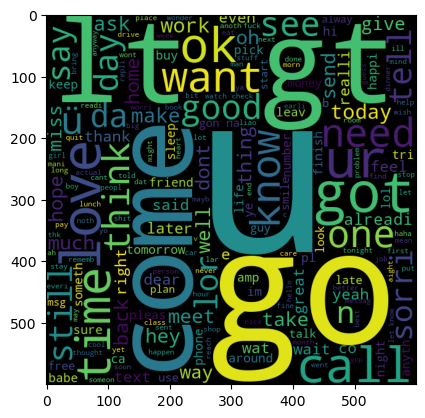

In [123]:
# shows the common words used in ham mails 
plt.imshow(ham_wc)

In [128]:
df.head()

,Category,Message,no_characters,no_words,no_sentence,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [130]:
# converts message into words in list form
spam_corpus = []

for msg in df[df['Category'] == 1]['transformed_Message'].tolist():  
    for word in msg.split(): 
        spam_corpus.append(word) 


In [132]:
len(spam_corpus)

9781

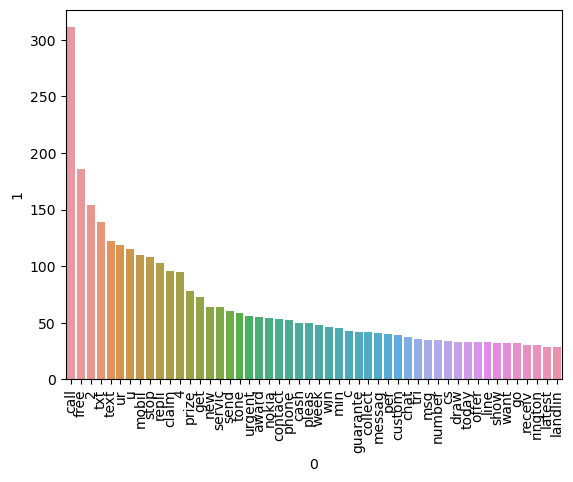

In [134]:
#top 50 most occoured words in spam  mails represented as bar plot
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')

plt.show()

In [136]:
ham_corpus = []

for msg in df[df['Category'] == 0]['transformed_Message'].tolist():  
    for word in msg.split(): 
        ham_corpus.append(word) 



In [138]:
len(ham_corpus)

35940

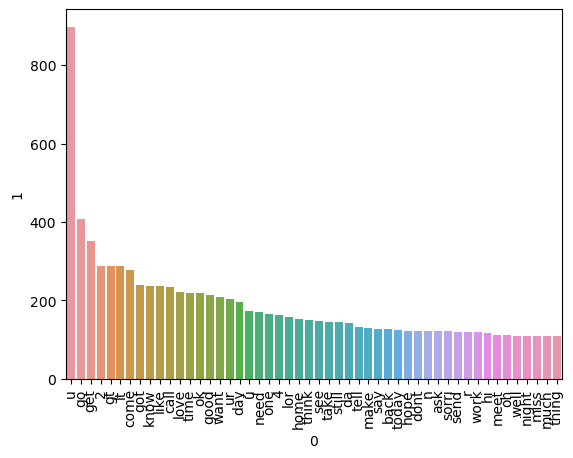

In [140]:
#top 50 most occoured words in ham mails represented as bar plot
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# feature engineering




In [146]:
# to convert input (transformed_messages) into vectors we use naivebayes and also Tfid

In [148]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [150]:
X= cv.fit_transform(df['transformed_Message']).toarray()


In [152]:
X.shape

(5157, 6781)

In [154]:
y = df['Category'].values

In [156]:
y


array([0, 0, 1, ..., 0, 0, 0])

# Data modeling





In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [160]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [162]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


In [164]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [166]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8682170542635659
[[1174  177]
 [  27  170]]
0.4899135446685879


In [168]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9786821705426356
[[1336   15]
 [  18  179]]
0.9226804123711341


In [170]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)  # Corrected to use 'bnb' instead of 'mnb'
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9722222222222222
[[1348    3]
 [  40  157]]
0.98125


In [174]:
#tfidf --> MNB

In [176]:
# models from classificaton algorithms (tested)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [178]:
# made objects for all ml models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [180]:
#keys: algorithm names, values: objects ( created dictionaries)
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [182]:
# create a  function which has classifier and training,testing data and caluculate precission and accuracy 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [186]:
#example
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9211886304909561, 0.6923076923076923)

In [193]:
# create a  function which has classifier and training,testing data and caluculate precission and accuracy 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [203]:
# we are storing these values in a dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [205]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905039,1.000000
5,RF,0.964470,1.000000
8,ETC,0.971576,1.000000
9,GBDT,0.948966,0.991667
10,xgb,0.970930,0.975000
7,BgC,0.961240,0.972414
4,LR,0.971576,0.952663
3,DT,0.927649,0.947368
6,AdaBoost,0.960594,0.930380
2,NB,0.978682,0.922680


In [211]:
# plotted a graph for accuracy and precession score ( so that we can know which algorithm to use ie which has more precission score and also a good accuracy score)
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'performance_df1' is not defined